In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_file = "city_data.csv"
ride_data_file = "ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_file)
ride_data = pd.read_csv(ride_data_file)
# Combine the data into a single dataset
cityride_merged = pd.merge(city_data,ride_data, on ="city")

# Display the data table for preview
cityride_merged.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [61]:
# Obtain the x and y coordinates for each of the three city types
# Our desired plot can be broken down into 3 plots based on city type. Within each city type group,
# we need all the respecitve cities and their Total Number of Rides(x-axis) and Average Fare(y-axis).
# The 3 dataframes from which we plot our data will have columns of:
# "City", "Average fare", "Total Number of Rides" "Driver Count". For each city type.
# We plot all 3 and color the plot points by city type.

# Grab all rows = "urban" cities from city_data. This will be the base DF for urban plotting. 
urban_city = city_data.loc[city_data["type"] == "Urban"]
urban_city = urban_city.set_index('city')
### check results urban_city

# Find the Average fare & ride count for each urban city and add that data onto the urban_city DF.
urban_rides = cityride_merged.loc[cityride_merged["type"]== "Urban"]
urban_avg_fare = (urban_rides.groupby('city'))['fare'].mean()
urban_ride_count = (urban_rides.groupby('city'))['fare'].count()

### check results  urban_avg_fare urban_ride_count
### urban_avg_fare/ride_count is a series indexed by city name. to join to the urban_city df 
#we need to set urban_city df index to 'city'

# Add average fare to each city in the urban_city DF
urban_city = urban_city.join(urban_avg_fare, how='outer')
urban_city = urban_city.join(urban_ride_count, rsuffix="rides", how='outer')
### check results urban_city
urban_city
### Doing a .count() & .mean() using the  ['fares'] index has resulted in 2 series with same column name. 
# In the above join we set a suffix name for the right joined column( total rides per city). 
# The suffix is now joined with the original coumn name resulting in column name: "farerides". Corect column names.
urban_city = urban_city.rename(columns={'farerides':'Total Ride Count','fare':'Average Fare'})
urban_city

# do the same for remaining city types

suburban_city = city_data.loc[city_data["type"] == "Suburban"]
rural_city = city_data.loc[city_data["type"] == "Rural"]

suburban_city = suburban_city.set_index('city')
rural_city = rural_city.set_index('city')


# Find the Average fare & ride count for each  city and add that data onto the respective city type DF.
suburban_rides = cityride_merged.loc[cityride_merged["type"]== "Suburban"]
rural_rides = cityride_merged.loc[cityride_merged["type"]== "Rural"]

suburban_avg_fare = (suburban_rides.groupby('city'))['fare'].mean()
suburban_ride_count = (suburban_rides.groupby('city'))['fare'].count()

rural_avg_fare = (rural_rides.groupby('city'))['fare'].mean()
rural_ride_count = (rural_rides.groupby('city'))['fare'].count()

# Add average fare to each city in the urban_city DF
suburban_city = suburban_city.join(suburban_avg_fare, how='outer')
suburban_city = suburban_city.join(suburban_ride_count, rsuffix="rides", how='outer')

rural_city = rural_city.join(rural_avg_fare, how='outer')
rural_city = rural_city.join(rural_ride_count, rsuffix="rides", how='outer')
### check results 
#suburban_city
#rural_city


### Doing a .count() & .mean() using the  ['fares'] index has resulted in 2 series with same column name. 
# In the above join we set a suffix name for the right joined column( total rides per city). 
# The suffix is now joined with the original coumn name resulting in column name: "farerides". Corect column names.
suburban_city = suburban_city.rename(columns={'farerides':'Total Ride Count','fare':'Average Fare'})
rural_city = rural_city.rename(columns={'farerides':'Total Ride Count','fare':'Average Fare'})
urban_city.head()

,driver_count,type,Average Fare,Total Ride Count
city,,,,
Amandaburgh,12,Urban,24.641667,18
Barajasview,26,Urban,25.332273,22
Carriemouth,52,Urban,28.314444,27
Christopherfurt,41,Urban,24.501852,27
Deanville,49,Urban,25.842632,19


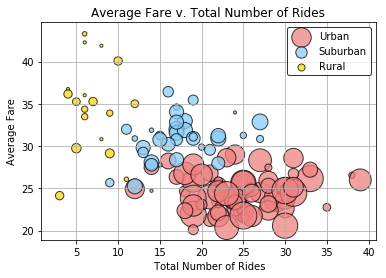

In [85]:
# Build the scatter plots for each city types
plt.scatter(urban_city['Total Ride Count'], urban_city['Average Fare'], s = urban_city['driver_count']*10, color = 'lightcoral', edgecolor = 'black', label = 'Urban', alpha = .75, linewidth = 1)
plt.scatter(suburban_city['Total Ride Count'], suburban_city['Average Fare'], s = suburban_city['driver_count']*10, color = 'lightskyblue', edgecolor = 'black', label = 'Suburban', alpha = .75, linewidth= 1)
plt.scatter(rural_city['Total Ride Count'], rural_city['Average Fare'], s = rural_city['driver_count']*10, color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .75, linewidth = 1)

# Incorporate the other graph properties
plt.grid()
plt.xlabel(" Total Number of Rides")
plt.ylabel("Average Fare")
plt.title("Average Fare v. Total Number of Rides")
# Create a legend
plt.legend(loc="best", edgecolor= "black")

# Incorporate a text label regarding circle size

# Save Figure
#plt.show()

In [65]:
# Show plot
plt.show()

## Total Fares by City Type

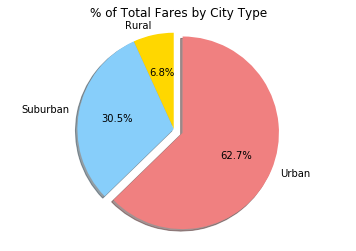

In [133]:
# Calculate Driver Percents
type_faresum = cityride_merged.groupby("type").sum()["fare"]
type_faresum_df = pd.DataFrame(type_faresum)
type_faresum_df
# Build Pie Charts
explode = (0,0,.1)
plt.pie(type_faresum_df["fare"],labels=type_faresum_df.index,explode = explode, colors=['gold','lightskyblue','lightcoral'] ,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

# Save Figure

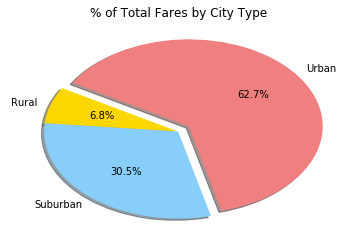

## Total Rides by City Type

In [ ]:
# Calculate Type Percents
total_rides = ride_data["fare"].count()
type_ride_count = cityride_merged.groupby("type").count()
type_ride_count["Percent of Total"] = type_ride_count["ride_id"]/total_rides
type_ride_count
total_rides
# Build llist of city types to use as labels.
#city_types = city_data["type"].unique()



type_ride_count
# Build Pie Chart

plt.pie(type_ride_count["Percent of Total"], labels=type_ride_count.index, explode=explode,colors=['gold','lightskyblue','lightcoral'] ,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Percent of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.show()




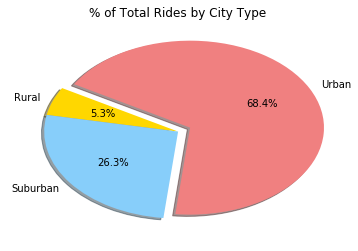

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

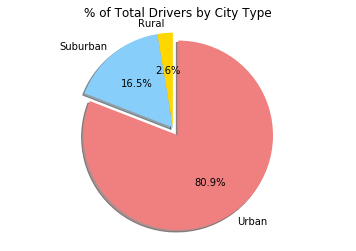

In [135]:
# Calculate Percentages
type_drivercount = city_data.groupby("type").sum()["driver_count"]
type_drivercount_df = pd.DataFrame(type_drivercount)
type_drivercount_df

# Build pie chart
plt.pie(type_drivercount_df["driver_count"],labels=type_drivercount_df.index,explode = explode, colors=['gold','lightskyblue','lightcoral'] ,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

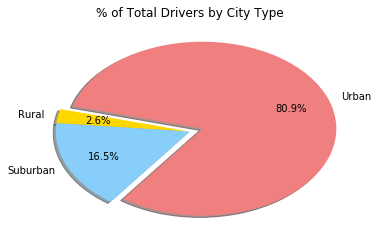

In [6]:
# Show Figure
plt.show()